In [1]:
import numpy as np
import pandas as pd
from scipy.io import netcdf
import scipy.signal
from datetime import datetime
import matplotlib.pyplot as plt
import random as rand
from wavesim1d import *



%load_ext autoreload
%autoreload 2

In [2]:
#Load a sample avg spectra

#fname = "/Volumes/TFO-exFAT-1/TFO/LCDRI/CDIPwaverider229/229p1_d01.nc";
fname = "/Users/jamesstadler/Documents/UW/TFO/Data/LCDRI/229p1_d01.nc"
[times, f, spectra] = load_CDIP(fname)
test_spectra = np.mean(spectra[100:110, :], 0)

In [11]:

#Now make a 2-d  velocity grid field from a spectrum
#Assume random phase, and random direction





#Now we take the spectra

nblock = 1200
overlap = int(nblock/2)
fs = 10
Cmax = 1000
w = nblock


#Em-APEX Sampling Grid
t_range = np.arange(0, 1000, 0.1)
t_range, em_x, em_z = apex_sampling_grid(t_range)

#build the u-time-series
[u_store, u_noise] = build_u_timeseries(t_range, em_z, em_x, test_spectra, f)

#Reshape the u time series
[u_new, z_new] = reshape_u(u_store, em_z, nblock, overlap, fs)
[u_new_noise, z_new] = reshape_u(u_noise, em_z, nblock, overlap, fs)


#Make the actual spectra by calling the function above
UUwindow, fwindow= make_vel_spectrum(u_new, fs)
UUwindow_noise, fwindow = make_vel_spectrum(u_new_noise, fs)


#Compute the raw Energy Density Spectra
UU = np.nanmean(np.nanmean(UUwindow, axis=0), axis=0)/(int(w/2)*fs)
#UU_noise = np.nanmean(np.nanmean(UUwindow_noise, axis=0), axis=0)/(int(w/2)*fs)
Exx = UU[1:]/ (np.square((2*np.pi*fwindow[1:])))
#Exx_noise = UU_noise[1:]/ (np.square((2*np.pi*fwindow[1:])))


#Apply Eric's Correction
[UUwindow_Eric1, UUwindow_Eric2, UUwindow_Eric3, UUwindow_Eric4] = depth_correct_Eric(UUwindow, fwindow, z_new, w, Cmax, fs)
#Compute the raw Energy Density Spectra
UU_Eric1 = np.nanmean(np.nanmean(UUwindow_Eric1, axis=0), axis=0)/(int(w/2)*fs)
Exx_Eric1 = UU_Eric1[1:]/ (np.square((2*np.pi*fwindow[1:])))

UU_Eric2 = np.nanmean(np.nanmean(UUwindow_Eric2, axis=0), axis=0)/(int(w/2)*fs)
Exx_Eric2 = UU_Eric2[1:]/ (np.square((2*np.pi*fwindow[1:])))

UU_Eric3 = np.nanmean(np.nanmean(UUwindow_Eric3, axis=0), axis=0)/(int(w/2)*fs)
Exx_Eric3 = UU_Eric3[1:]/ (np.square((2*np.pi*fwindow[1:])))

UU_Eric4 = np.nanmean(np.nanmean(UUwindow_Eric4, axis=0), axis=0)/(int(w/2)*fs)
Exx_Eric4 = UU_Eric4[1:]/ (np.square((2*np.pi*fwindow[1:])))

2.794047566504449
2.4373072879437245


/Users/jamesstadler/Documents/UW/TFO/Code/WaveSimulations/wavesim1d.py:289: RuntimeWarning: invalid value encountered in true_divide
  G = np.square((np.square(np.pi)/(np.square(kWT/2)+np.square(np.pi)))*(np.sinh(kWT/2)/(kWT)))
/Users/jamesstadler/Documents/UW/TFO/Code/WaveSimulations/wavesim1d.py:290: RuntimeWarning: invalid value encountered in true_divide
  G_mod = np.square((1/(2*np.pi))*np.sinh(kWT/2)/(np.power(kWT/(2*np.pi), 3)+kWT/(2*np.pi)))
/Users/jamesstadler/Documents/UW/TFO/Code/WaveSimulations/wavesim1d.py:314: RuntimeWarning: overflow encountered in cosh
  G3 = 1/(1+2*h*(np.cosh((z_mat*np.square(omega_mat+dw)-np.square(omega_mat))/9.8)-1))
/var/folders/77/7yfflvs902s95j6rlhb5yn9c0000gn/T/ipykernel_37389/3324862237.py:44: RuntimeWarning: Mean of empty slice
  UU_Eric1 = np.nanmean(np.nanmean(UUwindow_Eric1, axis=0), axis=0)/(int(w/2)*fs)
/var/folders/77/7yfflvs902s95j6rlhb5yn9c0000gn/T/ipykernel_37389/3324862237.py:47: RuntimeWarning: Mean of empty slice
  UU_Eric2 = np.na

1.7549881345714784


/var/folders/77/7yfflvs902s95j6rlhb5yn9c0000gn/T/ipykernel_37389/2513454261.py:31: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([f[0]-0.05, 0.65])


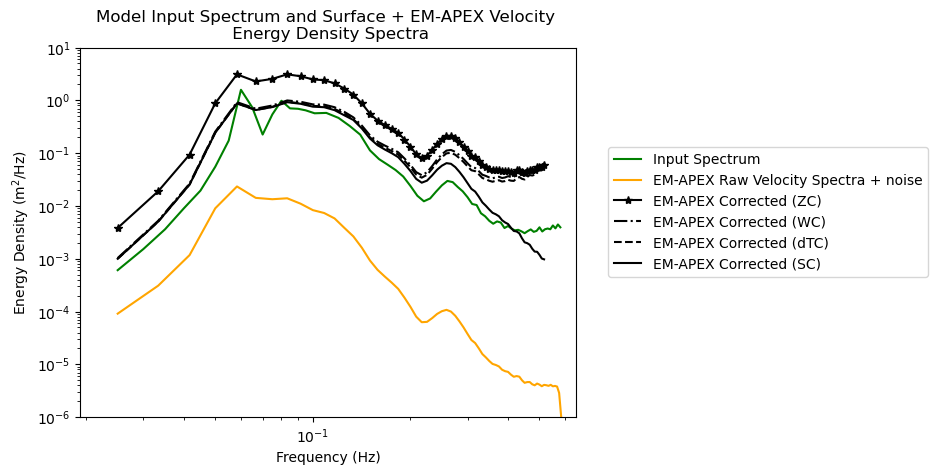

In [19]:
#Plot Spectra

nblock =1200
overlap = 600
fs=10
w=120
[u_surf, z_new] = reshape_u(u_noise_surf, t_range_surf, nblock, overlap, fs)

UUwindow_surf, fwindow_surf= make_vel_spectrum(u_surf, fs)
UU_surf = np.nanmean(UUwindow_surf, axis=0)/(int(w/2)*fs)
Exx_surf = np.nanmean(UU_surf[:, 1:], axis=0)/ (np.square((2*np.pi*fwindow_surf[1:])))



plt.loglog(f, test_spectra, 'g', label="Input Spectrum")
#plt.loglog(fwindow_surf[1:], Exx_surf, 'b', label="Surface Velocity + noise ")
plt.loglog(fwindow[3:], Exx[2:], color='orange', label = "EM-APEX Raw Velocity Spectra + noise")
plt.loglog(fwindow[3:], Exx_Eric1[2:], '-*k', label = "EM-APEX Corrected (ZC)")
plt.loglog(fwindow[3:], Exx_Eric2[2:], '-.k', label = "EM-APEX Corrected (WC)")
plt.loglog(fwindow[3:], Exx_Eric3[2:], '--k', label = "EM-APEX Corrected (dTC)")
plt.loglog(fwindow[3:], Exx_Eric4[2:], 'k', label = "EM-APEX Corrected (SC)")


#Get min/max integration bounds for swh calculation
lbound = f[0];
ubound = fwindow[-1]
#plt.fill_between(fwindow[3:], 0, Exx_Eric1[2:], where=(fwindow[3:] <= ubound) & (fwindow[3:] >= lbound-.01), alpha=0.5)

#plt.legend(loc='lower left')
plt.legend(bbox_to_anchor=(1.05, 0.75))
plt.xlim([f[0]-0.05, 0.65])
plt.ylim([10**-6, 10])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Energy Density (m$^2$/Hz)")
plt.title("Model Input Spectrum and Surface + EM-APEX Velocity \n Energy Density Spectra")
save_folder="/Users/jamesstadler/Documents/UW/TFO/Figures/LCDRI/WaveSimulations/"


#plt.savefig(save_folder+"Input_Surface_Raw_1d.png")

In [21]:
times[1]

1489862025